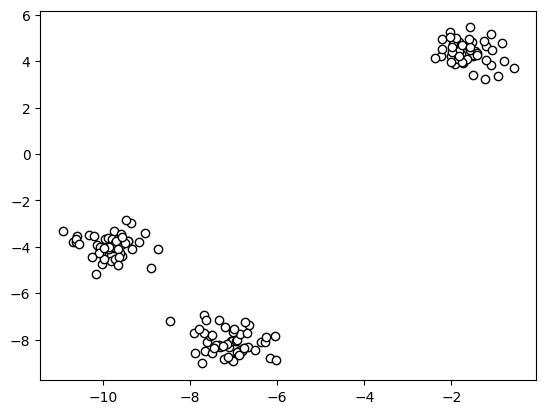

In [13]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=1)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='white', edgecolors='black')
plt.show()

* k-평균 알고리즘 - k는 군집이 몇 개인지 사람이 정하는 것.
* n_init= 시작할 때부터 가장 안정된 상태로 시작하는 것
* tol= 수렴 안정이 잘 되지 않을 때

In [14]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', max_iter=300, n_init=10, random_state=0)
km.fit(X)

KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

In [15]:
p = km.predict(X)
p

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2,
       2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1,
       0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1])

In [16]:
km.cluster_centers_

array([[-7.0951497 , -8.1114237 ],
       [-9.8394448 , -3.96236399],
       [-1.6114244 ,  4.41658512]])

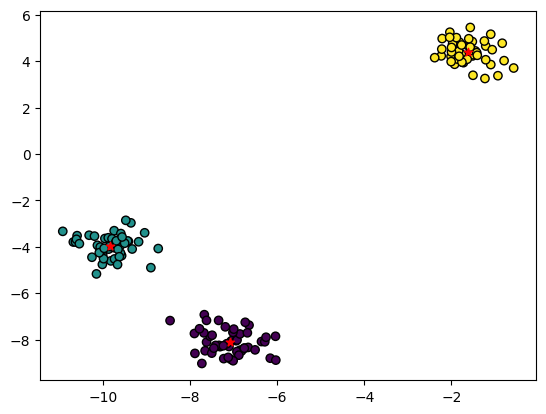

In [17]:
centers = km.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=p, edgecolors='black')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*')
plt.show()

# 실루엣 계수

### 실루엣 계수는 각 샘플이 자신이 속한 클러스터와 얼마나 잘 맞고, 다른 클러스터와 얼마나 잘 구분되어 있는지를 측정하는 것. 
### 실루엣 계수가 1에 가까울수록 해당 샘플은 자신이 속한 클러스터와 밀접하게 관련되어 있고, 다른 클러스터와는 잘 구분되어 있음

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# 이해 필요

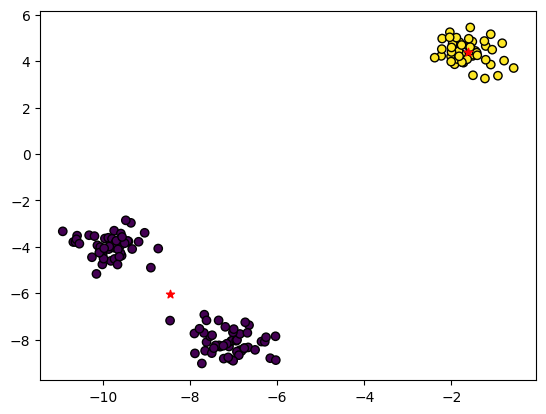

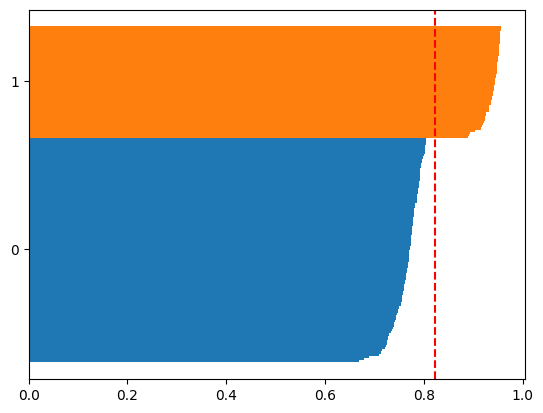

In [21]:
# 모델 생성/학습
km = KMeans(n_clusters=2, init='random', max_iter=300, n_init=10, random_state=0)
km.fit(X)
p = km.predict(X)

# 모델 군집화 결과 시각화
centers = km.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=p, edgecolors='black')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*')
plt.show()

# 실루엣 그래프 시각화
vals = silhouette_samples(X, p, metric='euclidean')
sil_score = silhouette_score(X, p, metric='euclidean')
labels = np.unique(p)

plt.figure()
y_low = 0
y_high = 0
y_ticks = []
for i in labels:
    ivals = vals[p == i]
    ivals.sort()
    y_high += len(ivals)
    plt.barh(range(y_low, y_high), ivals, height=1, edgecolor='none')
    y_ticks.append((y_low+y_high)/2)
    y_low = y_high

plt.axvline(sil_score, color='red', linestyle='--')
plt.yticks(y_ticks, labels)
plt.show()

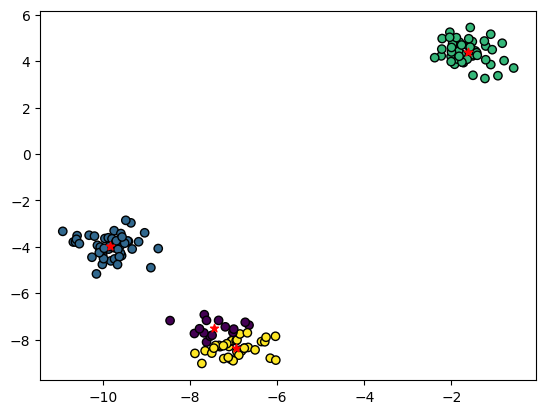

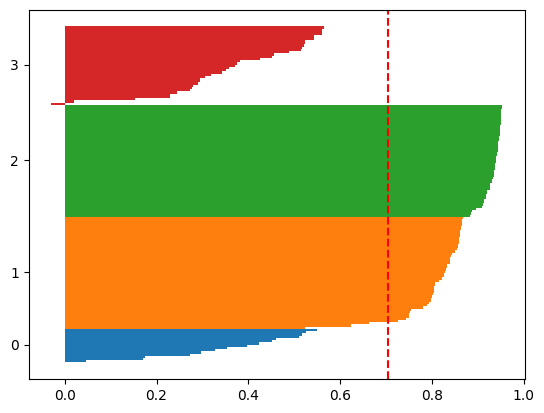

In [65]:
# 모델 생성/학습
km = KMeans(n_clusters=4, init='random', max_iter=300, n_init=10, random_state=0)
km.fit(X)
p = km.predict(X)

# 모델 군집화 결과 시각화
centers = km.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=p, edgecolors='black')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*')
plt.show()

# 실루엣 그래프 시각화
vals = silhouette_samples(X, p, metric='euclidean')
sil_score = silhouette_score(X, p, metric='euclidean')
labels = np.unique(p)

plt.figure()
y_low = 0
y_high = 0
y_ticks = []
for i in labels:
    ivals = vals[p == i]
    ivals.sort()
    y_high += len(ivals)
    plt.barh(range(y_low, y_high), ivals, height=1, edgecolor='none')
    y_ticks.append((y_low+y_high)/2)
    y_low = y_high

plt.axvline(sil_score, color='red', linestyle='--')
plt.yticks(y_ticks, labels)
plt.show()

In [50]:
sil_score

0.8603266510756534

In [34]:
vals.shape

(150,)

In [35]:
X.shape

(150, 2)

# 오후

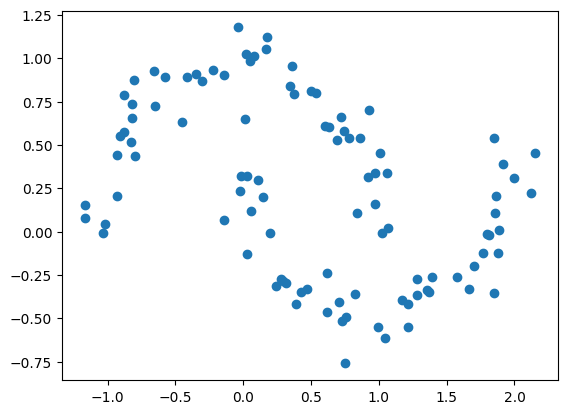

In [66]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1, random_state=1)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

 ### ε-이웃(거리) 내의 데이터 포인트가 최소 개수(MinPts) 이상인 경우, 
 ### 이 데이터 포인트를 중심점(core point)으로 간주하고 새로운 클러스터를 형성

* 데이터가 적을 때 취약
* 먼저 그래프를 보고 잘 안 나올 것 같으면 KernelPCA(차원축소)를 해주고 한다.

In [77]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
p = db.fit_predict(X)

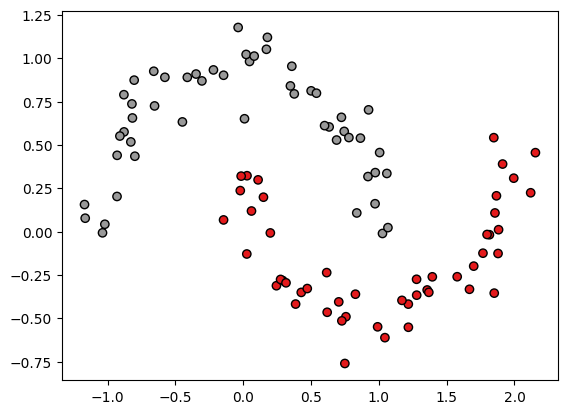

In [83]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=p, edgecolors='black', cmap='Set1')
plt.show()

In [73]:
p

array([ 0,  3, -1,  0, -1,  7,  4,  0,  1,  2,  3,  4,  5,  5,  5,  6,  6,
        4,  0,  7,  7,  1,  3,  2,  7,  4,  3,  6,  9,  4,  1, -1, -1,  3,
        3,  4,  9, -1,  8, -1,  3,  5,  0,  7,  0,  4,  9,  3,  8, -1,  4,
        5,  8,  7,  5,  9,  7, -1,  7, -1,  6,  2,  1,  4,  9,  3,  7,  2,
        7,  3,  5,  8,  2,  2,  7,  3,  7,  1,  0,  7,  6,  6,  7,  7,  8,
       -1,  8,  7,  1,  0,  7,  7,  2,  0,  7,  0,  7, -1,  7,  4],
      dtype=int64)

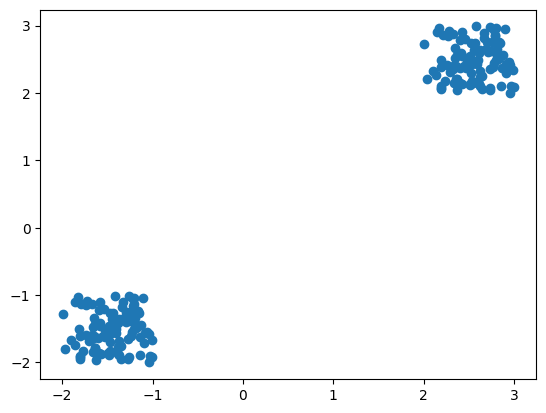

In [133]:
X = np.random.rand(100, 2)
X = np.r_[X+2, X-2]

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

###  정상 데이터의 분포를 학습하여 새로운 데이터가 정상 데이터에 속하는지 여부를 판별하는 기법.
### 정상 데이터의 특성을 학습하여 이를 기반으로 이상치로 간주되는 데이터를 식별하는 것이 목표

In [22]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(gamma=0.1, nu=0.1, kernel='rbf')
ocsvm.fit(X)
# ocsvm.predict()

OneClassSVM(gamma=0.1, nu=0.1)

In [23]:
def plot_ocsvm_regions(X, classifier, resolution=0.02):

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

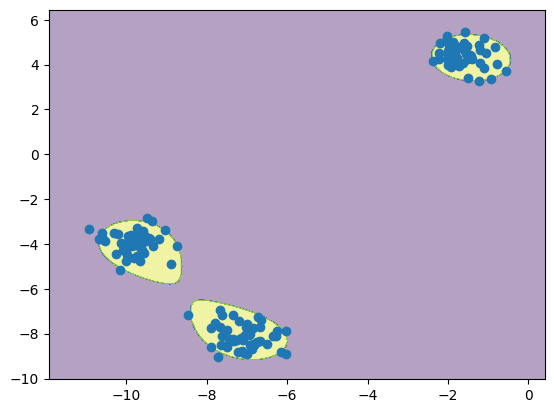

In [24]:
plot_ocsvm_regions(X, ocsvm)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [25]:
def plot_ocsvm_regions_subplot(X, classifier, ax, resolution=0.02):

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

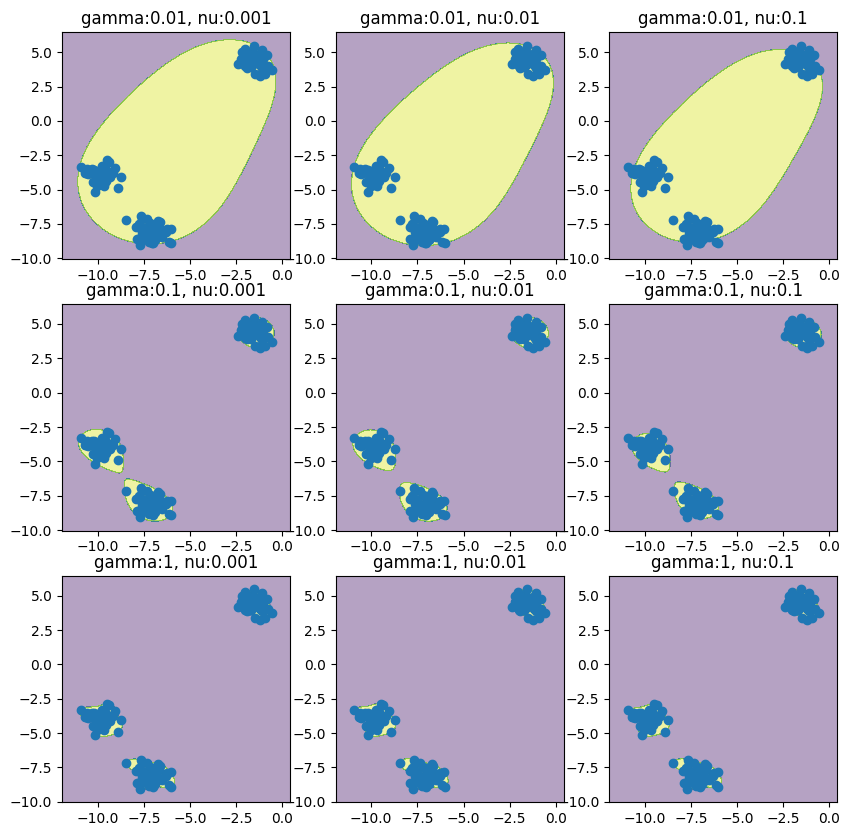

In [26]:
# gamma가 크면 클수록 복잡도가 커진다. 과대적합을 조절
# nu 이상치가 얼마나 있다고 볼 것인가. 0.001은 1%가 이상치가 있을 것이다.
fig, axes = plt.subplots(3, 3, figsize=(10,10))
for i, gamma in enumerate([0.01, 0.1, 1]):
    for j, nu in enumerate([0.001, 0.01, 0.1]):
        ocsvm = OneClassSVM(gamma=gamma, nu=nu, kernel='rbf')
        ocsvm.fit(X)
        plot_ocsvm_regions_subplot(X, ocsvm, ax=axes[i][j])
        ax=axes[i][j].scatter(X[:,0], X[:,1])
        ax=axes[i][j].set_title(f'gamma:{gamma}, nu:{nu}')
plt.show()